# **EDA Process**

In [ ]:
# Importing Pandas and Numpy to help with all calculations throughout this assignment
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for displaying visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import files

## NBA Votes Data

In [ ]:
# Importing NBA votes data file
df_awards = pd.read_csv('All_NBA_Voting_Ballots.csv')

# Removing unwanted columns
df_awards.drop(columns=['voter_name', 'affiliation'], inplace=True)

# Only get data for All-NBA votes
df_all_nba = df_awards[df_awards['award'] == 'All-NBA']

# Resulting df (containing only total votes for all-NBA nominations)
total_votes_df = pd.DataFrame(columns=['player_name', 'season', 'total_votes'])

In [ ]:
custom_votes_df = []

# Loop through unique combinations of player and year
for player in df_all_nba['player'].unique():
    for year in df_all_nba[df_all_nba['player'] == player]['year'].unique():
        total_votes = df_all_nba[(df_all_nba['year'] == year) & (df_all_nba['player'] == player)]['points_given'].sum()

        # Create a DataFrame for the current player and year
        df_player_year = pd.DataFrame({'player_name': [player], 'season': [year], 'total_votes': [total_votes]})

        # Append the DataFrame to the list
        custom_votes_df.append(df_player_year)

# Concatenate all DataFrames in the list
total_votes_df = pd.concat(custom_votes_df, ignore_index=True)

In [ ]:
total_votes_df

,player_name,season,total_votes
0,Giannis Antetokounmpo,2023,500
1,Giannis Antetokounmpo,2022,500
2,Giannis Antetokounmpo,2021,500
3,Giannis Antetokounmpo,2020,500
4,Giannis Antetokounmpo,2019,500
...,...,...,...
342,Chris Bosh,2014,1
343,Lance Stephenson,2014,3
344,Ty Lawson,2014,2
345,Monta Ellis,2014,1


In [ ]:
# Creating a seperate total votes df for the 2023 season
total_votes_2023 = total_votes_df[total_votes_df['season'] == 2023]

# Creating a df with the top 15 voted players to eventually use to classify
# as if they made the all-nba team or not. This data was cross referenced with
# the NBA website (https://www.nba.com/news/2022-23-all-nba-teams-announced) to
# ensure validity.
all_nba_2023 = total_votes_2023.sort_values(by='total_votes', ascending=False).head(15)

## 2014-2022 RAPTOR Data

In [ ]:
# Loading data from RAPTOR data file
raptor_2014_2022_df = pd.read_csv('modern_RAPTOR_by_player.csv')

In [ ]:
# Viewing samples of RAPTOR data
raptor_2014_2022_df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,...,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728609


In [ ]:
# Checking data types
raptor_2014_2022_df.dtypes

player_name              object
player_id                object
season                    int64
poss                      int64
mp                        int64
raptor_box_offense      float64
raptor_box_defense      float64
raptor_box_total        float64
raptor_onoff_offense    float64
raptor_onoff_defense    float64
raptor_onoff_total      float64
raptor_offense          float64
raptor_defense          float64
raptor_total            float64
war_total               float64
war_reg_season          float64
war_playoffs            float64
predator_offense        float64
predator_defense        float64
predator_total          float64
pace_impact             float64
dtype: object

In [ ]:
# Converting columns to suitable types
raptor_2014_2022_df['player_name'] = raptor_2014_2022_df['player_name'].astype('string')
raptor_2014_2022_df['player_id'] = raptor_2014_2022_df['player_id'].astype('string')

In [ ]:
# Verify changes
raptor_2014_2022_df.dtypes

player_name             string[python]
player_id               string[python]
season                           int64
poss                             int64
mp                               int64
raptor_box_offense             float64
raptor_box_defense             float64
raptor_box_total               float64
raptor_onoff_offense           float64
raptor_onoff_defense           float64
raptor_onoff_total             float64
raptor_offense                 float64
raptor_defense                 float64
raptor_total                   float64
war_total                      float64
war_reg_season                 float64
war_playoffs                   float64
predator_offense               float64
predator_defense               float64
predator_total                 float64
pace_impact                    float64
dtype: object

In [ ]:
# Getting statistcal summary of RAPTOR dataset
raptor_2014_2022_df.describe()

,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,4685.000000,4685.000000,4685.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4684.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4684.000000
mean,2018.168196,2443.001281,1186.706937,-1.114137,-0.422305,-1.536442,-1.584763,0.113609,-1.471154,-1.278051,-0.334170,-1.612221,1.743696,1.564623,0.179074,-1.181426,-0.618128,-1.799554,0.056334
std,2.597849,1850.813297,905.942172,3.737573,3.796795,5.459275,6.411814,6.210336,8.796287,4.119925,4.015186,5.840575,3.138602,2.749270,0.618952,3.449029,3.369168,5.193851,0.962170
min,2014.000000,2.000000,1.000000,-44.186275,-48.188577,-61.674521,-67.777478,-89.096123,-156.873601,-45.323308,-56.982520,-67.356001,-7.382978,-7.382978,-1.376520,-36.433265,-37.871745,-69.092367,-7.191955
25%,2016.000000,709.000000,341.000000,-2.477573,-1.798489,-3.425948,-3.326214,-1.860180,-4.002925,-2.685659,-1.769847,-3.511722,-0.095479,-0.098846,0.000000,-2.596552,-1.972464,-3.958671,-0.456289
50%,2018.000000,2252.000000,1087.000000,-0.924596,-0.285939,-1.004776,-1.066774,0.012819,-0.900078,-1.005402,-0.232389,-1.110777,0.558707,0.538689,0.000000,-1.056913,-0.488000,-1.435344,-0.015757
75%,2020.000000,3880.000000,1894.000000,0.505297,1.169595,1.024035,1.124656,1.979235,2.004681,0.517681,1.248538,1.086221,2.727875,2.550723,0.037867,0.402491,1.018531,0.929273,0.465970
max,2022.000000,8026.000000,3948.000000,47.557637,57.305705,54.871237,85.406822,66.523461,123.151953,53.228864,62.469205,72.622361,26.666873,23.659318,6.189236,42.890281,42.989063,49.106166,15.817705


In [ ]:
# Checking data for missing values
raptor_2014_2022_df.isnull().sum()

player_name             0
player_id               0
season                  0
poss                    0
mp                      0
raptor_box_offense      1
raptor_box_defense      1
raptor_box_total        1
raptor_onoff_offense    1
raptor_onoff_defense    1
raptor_onoff_total      1
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             1
dtype: int64

In [ ]:
# Viewing dimensions of RAPTOR data
raptor_2014_2022_df.shape

(4685, 21)

In [ ]:
# Dropping missing values
raptor_2014_2022_clean_df = raptor_2014_2022_df.dropna()

In [ ]:
# Viewing dimensions of RAPTOR data again (to see if null values have been dropped)
raptor_2014_2022_clean_df.shape

(4684, 21)

In [ ]:
# Checking to make sure there are no missing values left
raptor_2014_2022_clean_df.isnull().sum()

player_name             0
player_id               0
season                  0
poss                    0
mp                      0
raptor_box_offense      0
raptor_box_defense      0
raptor_box_total        0
raptor_onoff_offense    0
raptor_onoff_defense    0
raptor_onoff_total      0
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             0
dtype: int64

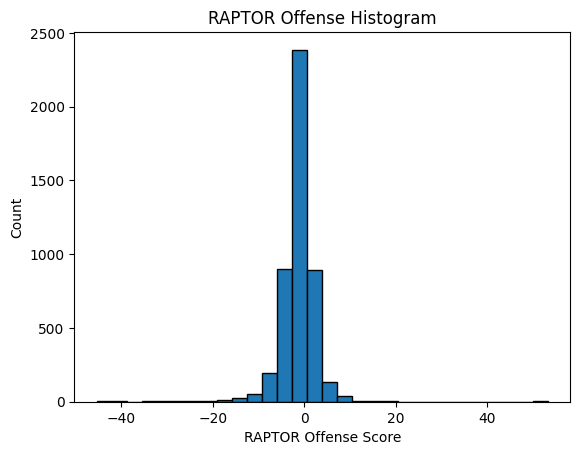

In [ ]:
# Plotting histogram of RAPTOR offense scores
plt.hist(raptor_2014_2022_clean_df['raptor_offense'], 30, edgecolor='black')
plt.title('RAPTOR Offense Histogram')
plt.xlabel('RAPTOR Offense Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# Finding the min and max of the RAPTOR offensive scores
print('The minimimum raptor_offense score is:', raptor_2014_2022_clean_df['raptor_offense'].min())
print('The maximmum raptor_offense score is:', raptor_2014_2022_clean_df['raptor_offense'].max())

The minimimum raptor_offense score is: -45.32330849
The maximmum raptor_offense score is: 53.2288638


In [ ]:
# Finding the top 5 players with the highest RAPTOR offense scores
top_5_raptor_offense = raptor_2014_2022_clean_df.sort_values(by = 'raptor_offense',ascending=False).head(5)
top_5_raptor_offense

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
2608,DeAndre Liggins,liggide01,2014,3,1,41.724841,-18.228385,23.496456,85.406822,-62.108582,...,53.228864,-28.548543,24.680321,0.014008,0.014008,0.0,42.890281,-22.273383,20.616897,0.090756
3023,Naz Mitrou-Long,mitrona01,2018,3,1,47.557637,7.313599,54.871237,59.428781,63.723171,...,53.033254,19.589106,72.622361,0.040787,0.040787,0.0,40.169967,8.936199,49.106166,6.014441
376,Jordan Bell,belljo01,2022,4,2,19.527983,-34.393523,-14.865540,57.519233,-26.230761,...,28.699713,-34.694223,-5.994510,-0.003508,-0.003508,0.0,27.498952,-0.838915,26.660038,5.953309
989,Jamal Crawford,crawfja01,2020,15,6,24.138618,-9.948688,14.189929,27.768385,0.689653,...,26.406917,-8.338342,18.068575,0.063809,0.063809,0.0,23.644978,-8.129704,15.515274,0.126258
1759,Jared Harper,harpeja01,2022,85,43,18.460991,-2.384110,16.076882,18.107849,-11.484536,...,19.582936,-4.385390,15.197546,0.390254,0.390254,0.0,14.844597,-3.062697,11.781900,-0.886451


We plotted a histogram is see what the skew of the data looked like. While the RAPTOR offense scores looks normally distributed (basically all scores were in between the -20 to 20 range), the visualization looked relatively small, and this was due to some outlier data that stretched the histogram. We did a further check of the data to see what was causing the visualization to look so small, by printing the max and min values of the column, as well as sorting the df based on the max raptor offenses that players logged, to see who/what was topping the column in values. What we found was that the data was skewed by a lot of lesser role players, who played very few minutes (eg. DeAndre Liggins above, who only played 1 minute all season), but had a very high RAPTOR scores within their playing time. While this was interesting, we decided it was necessary to omit such outliers, as players who only play a minute all season (of 82 games) are most certainly not going to get consideration for any all-NBA awards. Usually, it is the stars (who play a high number of minutes, but still maintain high RAPTOR scores) who get these considerations. Therefore, we filtered the full dataset by the mean of the minutes played ('mp') column, such that all players data in our model were made up of players who played meaningful/significant minutes throughout the season, and had actual contribution to their teams offense/defense.

In [ ]:
# Filtering df for players who played a meaningful number of minutes each season
raptor_2014_2022_final_df = raptor_2014_2022_clean_df[raptor_2014_2022_clean_df['mp'] > raptor_2014_2022_clean_df['mp'].mean()]
raptor_2014_2022_final_df

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,...,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728609
6,Quincy Acy,acyqu01,2015,2517,1287,-2.014956,-1.268440,-3.283396,-3.855207,2.803842,...,-2.456065,-0.420948,-2.877013,-0.083313,-0.083313,0.000000,-2.797224,-1.648024,-4.445248,-0.100454
9,Quincy Acy,acyqu01,2018,2856,1359,-2.620032,-0.806269,-3.426301,0.055170,-0.019195,...,-2.208182,-0.658814,-2.866997,-0.081232,-0.081232,0.000000,-1.826813,-0.890246,-2.717059,0.136139
16,Steven Adams,adamsst01,2014,3078,1528,-1.270250,0.056605,-1.213644,-1.606126,-1.383816,...,-1.477308,-0.300116,-1.777424,0.741984,1.087877,-0.345893,-1.739690,1.022962,-0.716729,-0.076885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,Cody Zeller,zelleco01,2020,2724,1341,-0.407263,-0.778838,-1.186101,-0.363863,-3.326727,...,-0.358174,-1.293407,-1.651581,0.750759,0.750759,0.000000,-0.331085,-1.206129,-1.537214,-0.102655
4667,Tyler Zeller,zellety01,2015,3711,1821,-0.380890,0.602361,0.221471,-0.971372,-0.160065,...,-0.511845,0.460676,-0.051169,2.508760,2.410855,0.097906,-0.876438,0.320770,-0.555668,-0.025132
4682,Ivica Zubac,zubaciv01,2020,3447,1646,0.516422,3.529428,4.045850,3.314971,2.963001,...,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
4683,Ivica Zubac,zubaciv01,2021,3908,1910,-0.371753,2.960613,2.588860,-2.541995,0.156338,...,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623


In [ ]:
# Checking the top 5 players with the highest RAPTOR offense score (to see if it makes sense)
top_5_raptor_total_players = raptor_2014_2022_final_df.sort_values(by = 'raptor_offense',ascending=False).head(5)
top_5_raptor_total_players

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
1027,Stephen Curry,curryst01,2016,7053,3314,10.532883,1.688492,12.221375,7.781331,3.408263,...,10.379411,2.108447,12.487858,26.666873,23.659318,3.007555,10.635103,2.712822,13.347925,3.306111
1744,James Harden,hardeja01,2019,6728,3291,9.959259,1.792524,11.751782,5.379972,-1.766076,...,9.566047,1.149234,10.715281,22.791368,20.057946,2.733422,10.893131,1.676179,12.569309,0.463845
1028,Stephen Curry,curryst01,2017,6963,3239,8.343958,-0.273511,8.070447,11.207311,0.958065,...,9.308684,-0.095877,9.212807,20.653304,15.619612,5.033692,9.791555,0.593993,10.385548,3.581550
1743,James Harden,hardeja01,2018,6466,3172,9.390432,1.451237,10.841669,3.936261,0.569832,...,8.750965,1.316804,10.067769,20.926163,17.048015,3.878148,9.434385,1.615119,11.049504,0.331528
1032,Stephen Curry,curryst01,2021,4715,2152,8.884195,-2.399078,6.485117,5.510388,0.515109,...,8.738701,-1.939050,6.799651,10.760575,10.760575,0.000000,8.087152,-1.656422,6.430730,2.653507


As shown above, our data now makes much more sense, as the top players (with the highest RAPTOR offense scores) are Stephen Curry and James Harden, 2 very well-known NBA players who are specifically known for their offensive skill, and are definitely always considered for the all-NBA awards.

In [ ]:
# # Checking the top 5 players with the highest RAPTOR scores (to see if it also makes sense)
raptor_2014_2022_final_df.sort_values(by = 'raptor_box_total',ascending=False).head(5)

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
2304,Nikola Jokic,jokicni01,2022,5481,2647,8.443342,6.293564,14.736906,6.824536,3.397712,...,8.520715,6.051696,14.572411,23.905554,22.693872,1.211682,8.961989,5.602515,14.564504,2.058780
1027,Stephen Curry,curryst01,2016,7053,3314,10.532883,1.688492,12.221375,7.781331,3.408263,...,10.379411,2.108447,12.487858,26.666873,23.659318,3.007555,10.635103,2.712822,13.347925,3.306111
1744,James Harden,hardeja01,2019,6728,3291,9.959259,1.792524,11.751782,5.379972,-1.766076,...,9.566047,1.149234,10.715281,22.791368,20.057946,2.733422,10.893131,1.676179,12.569309,0.463845
3428,Chris Paul,paulch01,2014,5387,2643,7.845314,3.246182,11.091496,5.402485,4.426683,...,7.723907,3.668439,11.392346,19.271217,15.302202,3.969015,7.213998,4.203062,11.417060,0.370431
1743,James Harden,hardeja01,2018,6466,3172,9.390432,1.451237,10.841669,3.936261,0.569832,...,8.750965,1.316804,10.067769,20.926163,17.048015,3.878148,9.434385,1.615119,11.049504,0.331528


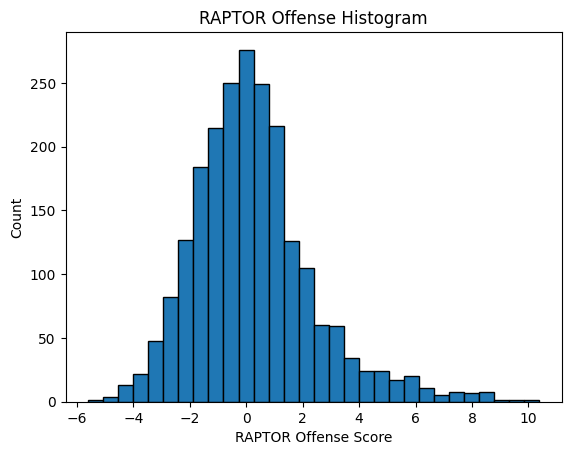

In [ ]:
# Creating another histogram of RAPTOR offense scores
plt.hist(raptor_2014_2022_final_df['raptor_offense'], 30, edgecolor='black')
plt.title('RAPTOR Offense Histogram')
plt.xlabel('RAPTOR Offense Score')
plt.ylabel('Count')
plt.show()

After removing the outlier data, we plotted another histogram to see if the distribution of RAPTOR offensive scores looked better. As shown above, the data is still quite normally distributed (with a slight positive skew, most likely due to the star players who are still a bit of outliers in their offensive production), but is now in a much more reasonable range of -6 to 10. This indicates that filtering the data by minutes played does help make our dataset more realistic and less prone to noise.

In [ ]:
# Checking the final shape of the RAPTOR data
raptor_2014_2022_final_df.shape

(2198, 21)

In [ ]:
## ONLY RUN THIS ONCE OR IT WILL MESS UP TOTAL_VOTES

# Combining the RAPTOR dataset with the 'total votes' data, such that each player (and their season) has the corresponding votes they received
# that season for their performances
raptor_2014_2022_final_df = pd.merge(raptor_2014_2022_final_df, total_votes_df, on=['player_name', 'season'], how='left')

# Filling missing values (NaN) with 0
raptor_2014_2022_final_df['total_votes'].fillna(0, inplace=True)

In [ ]:
raptor_2014_2022_final_df[raptor_2014_2022_final_df['total_votes'] > 0]

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,total_votes
8,Steven Adams,adamsst01,2018,5530,2687,0.605873,1.261217,1.867090,4.677629,0.385551,...,1.140201,2.607804,7.341425,6.779274,0.562151,1.496105,1.578666,3.074771,-0.278541,2.0
15,Bam Adebayo,adebaba01,2020,6336,3104,-0.947961,2.338247,1.390286,3.566561,1.244460,...,2.226652,2.122704,7.755916,5.311195,2.444721,0.722645,1.480391,2.203036,-0.649095,26.0
16,Bam Adebayo,adebaba01,2021,4655,2279,-0.045723,1.892020,1.846298,0.597446,0.827103,...,1.774597,1.889060,5.406504,5.372652,0.033852,0.142843,1.448066,1.590909,0.006968,32.0
17,Bam Adebayo,adebaba01,2022,4893,2439,-0.399473,3.721912,3.322439,1.775652,3.481456,...,3.848342,3.855427,8.275219,6.102629,2.172589,0.305492,3.410085,3.715578,-0.118148,28.0
22,LaMarcus Aldridge,aldrila01,2014,5862,2939,1.057440,1.847264,2.904703,2.919806,3.557629,...,2.326358,3.759874,9.746018,7.721584,2.024434,2.024422,2.497570,4.521992,-0.847995,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,Lou Williams,willilo02,2019,4775,2169,5.496733,-4.229918,1.266814,1.564380,-1.749677,...,-3.945944,1.063931,4.286623,4.304897,-0.018274,3.874560,-4.644651,-0.770091,1.713151,1.0
2157,Zion Williamson,willizi01,2021,4360,2026,3.657254,-0.804485,2.852769,2.461375,0.077214,...,-0.652527,2.965017,5.983387,5.983387,0.000000,2.850016,-0.829927,2.020089,1.298619,37.0
2185,Trae Young,youngtr01,2020,4645,2120,6.357112,-2.669411,3.687700,7.138746,-5.371945,...,-3.334710,3.716428,7.192127,7.192127,0.000000,7.476361,-3.784481,3.691880,2.888762,13.0
2186,Trae Young,youngtr01,2021,5690,2728,5.618794,-4.077334,1.541460,6.025458,-2.333304,...,-3.949627,2.119096,6.963372,5.481497,1.481875,6.574845,-4.543474,2.031370,2.125883,2.0


In [ ]:
# Export the finalized dataframe as CSV for easy use in modeling
# (We did not want to rerun the EDA process everytime so that we can be
# efficient in making and training models)
raptor_2014_2022_final_df.to_csv("raptor_final.csv")

In [ ]:
# Used to easily download the file onto the local computer when using Google Colab.
# Colab was used in our group so that we all easily edit the same file.

# from google.colab import files
# files.download("raptor_final.csv")

## 2014-2022 Box Score Data

In [ ]:
# Loading data from Box Score data file
df_box = pd.read_csv('all_seasons.csv')

In [ ]:
# Viewing samples of the data
df_box.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [ ]:
# Checking data types
df_box.dtypes

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [ ]:
# Removing undesired columns
df_box_drop_cols = df_box.drop(columns=['Unnamed: 0', 'college', 'country', 'draft_year', 'draft_round', 'draft_number'])
df_box_drop_cols.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [ ]:
# Changing seasons column to be formatted like RAPTOR data (2021-2022 -> 2022)
df_box_drop_cols['season'] = (df_box_drop_cols['season'].str.split('-').str[0].astype(int) + 1).astype(str)

In [ ]:
# Converting columns to suitable types
df_box_drop_cols['player_name'] = df_box_drop_cols['player_name'].astype('string')
df_box_drop_cols['team_abbreviation'] = df_box_drop_cols['team_abbreviation'].astype('string')
df_box_drop_cols['season'] = df_box_drop_cols['season'].astype('int64')

In [ ]:
# Verify if the change occured
df_box_drop_cols.dtypes

player_name          string[python]
team_abbreviation    string[python]
age                         float64
player_height               float64
player_weight               float64
gp                            int64
pts                         float64
reb                         float64
ast                         float64
net_rating                  float64
oreb_pct                    float64
dreb_pct                    float64
usg_pct                     float64
ts_pct                      float64
ast_pct                     float64
season                        int64
dtype: object

In [ ]:
# Getting statistcal summary of Box Score dataset
df_box_drop_cols.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,2010.609467
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,7.879836
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,2004.000000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,2011.000000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,2018.000000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,2023.000000


In [ ]:
# Checking data for missing values
df_box_drop_cols.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

As there is no missing data, no further steps need to be done for this stage.

Similar to the RAPTOR dataset, we checked the box score data to see if there was any outlier data. We used the column 'net_rating' to help determine outliers, as this column told us the average impact that a player had on a game. If the players are all-NBA quality, they should have very high net ratings. Conversely, if the player had a very high net rating, but was an unknown name, it probably means that players' data is an outlier, who just happened to play well with their team during the limited time/chances they got. The Box Score data, however, did not have a minutes played ('mp') column. We instead used the 'gp' (games played) column to filter the dataset, as (in theory) that column gave us similar information about the player's impact and importance to their team (the more games a player plays, barring injury, the higher indication that they are important to their team).

In [ ]:
# Checking the top 5 players with the highest Box Score net rating (to see if it makes sense)
top_5_box_net_rating = df_box_drop_cols.sort_values(by = 'net_rating',ascending=False).head(5)
top_5_box_net_rating

,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
127,Bruce Bowen,MIA,26.0,200.66,90.718400,1,0.0,0.0,0.0,300.0,0.0,0.0,0.000,0.0,0.0,1997
9608,Naz Mitrou-Long,UTA,24.0,193.04,98.883056,1,3.0,0.0,0.0,250.0,0.0,0.0,0.500,1.5,0.0,2018
10692,J.P. Macura,CLE,25.0,193.04,92.079176,1,0.0,0.0,0.0,150.0,0.0,0.0,0.000,0.0,0.0,2020
11963,Ahmad Caver,IND,25.0,187.96,78.925008,1,2.0,0.0,0.0,133.3,0.0,0.0,0.500,1.0,0.0,2022
8571,Jerrelle Benimon,DEN,23.0,203.00,111.000000,2,0.0,1.5,0.0,120.0,1.0,0.4,0.167,0.0,0.0,2015


In [ ]:
# Filtering df for players who played a meaningful number of games each season
df_box_final = df_box_drop_cols[df_box_drop_cols['gp'] > df_box_drop_cols['gp'].mean()]
df_box_final

,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1997
3,George McCloud,LAL,30.0,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1997
4,George Zidek,DEN,23.0,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1997
5,Gerald Wilkins,ORL,33.0,198.12,102.058200,80,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1997
6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,73,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12836,Joe Harris,BKN,31.0,198.12,99.790240,74,7.6,2.2,1.4,-1.0,0.016,0.089,0.141,0.621,0.091,2023
12839,Joel Embiid,PHI,29.0,213.36,127.005760,66,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2023
12841,John Collins,ATL,25.0,205.74,102.511792,71,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2023
12842,Jericho Sims,NYK,24.0,208.28,113.398000,52,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2023


In [ ]:
# Checking the top 5 players with the highest Box Score net rating (to see if it makes sense after filtering)
top_5_box_net_rating_final = df_box_final.sort_values(by = 'net_rating',ascending=False).head(5)
top_5_box_net_rating_final

,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
8636,Draymond Green,GSW,26.0,200.66,104.32616,81,14.0,9.5,7.4,18.9,0.056,0.222,0.186,0.587,0.277,2016
9467,JaVale McGee,GSW,29.0,213.36,122.46984,77,6.1,3.2,0.2,18.7,0.156,0.187,0.226,0.642,0.032,2017
8930,Stephen Curry,GSW,28.0,190.50,86.18248,79,30.1,5.4,6.7,18.3,0.029,0.131,0.320,0.669,0.315,2016
5711,Ben Wallace,CLE,34.0,205.74,108.86208,56,2.9,6.5,0.8,17.9,0.126,0.198,0.077,0.450,0.045,2009
9257,Stephen Curry,GSW,29.0,190.50,86.18248,79,25.3,4.5,6.6,17.2,0.027,0.113,0.292,0.624,0.287,2017


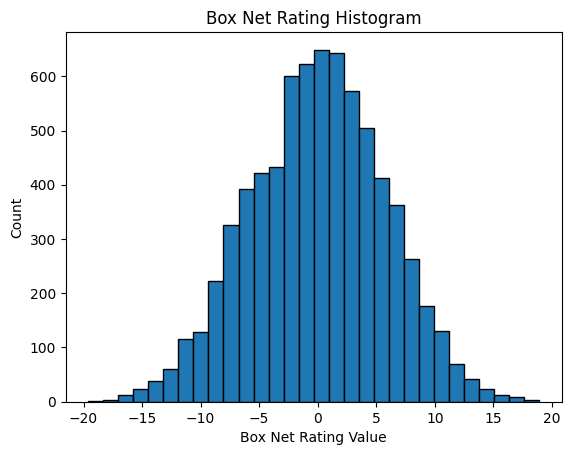

In [ ]:
# Plotting histogram of Box Score net ratings
plt.hist(df_box_final['net_rating'], 30, edgecolor='black')
plt.title('Box Net Rating Histogram')
plt.xlabel('Box Net Rating Value')
plt.ylabel('Count')
plt.show()

As shown in the histogram above, removing outliers from the Box Score dataset generated quite an evenly distributed histogram, where all the players' net ratings fell in between the -20 to 20 range.

In [ ]:
## ONLY RUN THIS ONCE OR IT WILL MESS UP TOTAL_VOTES

# Combining the Box Score dataset with the 'total votes' data
df_box_final = pd.merge(df_box_final, total_votes_df, on=['player_name', 'season'], how='left')

# Fill missing values (NaN) with 0
df_box_final['total_votes'].fillna(0, inplace=True)

In [ ]:
# Filtering the Box Score data to only contain data from 2014-2022, such that the data used to train the models
# (for both RAPTOR and Box Score) is consistent and within the same time frame
df_box_final = df_box_final[df_box_final['season'] >= 2014]
df_box_final = df_box_final[df_box_final['season'] <=2022]

In [ ]:
# Exporting the final box score dataframe as CSV for later ease of future use.
df_box_final.to_csv("boxScore_final.csv")

In [ ]:
# Again this is for Google Colab use
#files.download("boxScore_final.csv")

## Latest (2023) Raptor Data

In [ ]:
# Importing the RAPTOR data for the 2023 season
# The later model analysis will show that RAPTOR is the better data source
# compared to Box Score, so we will try to predict the 2023 All-NBA team using
# RAPTOR data

raptor_2023_df = pd.read_csv('latest_RAPTOR_by_player.csv')

In [ ]:
# Checking the data types of each feature
raptor_2023_df.dtypes

player_name              object
player_id                object
season                    int64
poss                      int64
mp                        int64
raptor_box_offense      float64
raptor_box_defense      float64
raptor_box_total        float64
raptor_onoff_offense    float64
raptor_onoff_defense    float64
raptor_onoff_total      float64
raptor_offense          float64
raptor_defense          float64
raptor_total            float64
war_total               float64
war_reg_season          float64
war_playoffs            float64
predator_offense        float64
predator_defense        float64
predator_total          float64
pace_impact             float64
dtype: object

In [ ]:
# Converting features to the correct type
raptor_2023_df['player_name'] = raptor_2023_df['player_name'].astype('string')
raptor_2023_df['player_id'] = raptor_2023_df['player_id'].astype('string')

In [ ]:
# Getting an overview of the dataset
raptor_2023_df.describe()

,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,541.0,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,2023.0,2463.776340,1174.415896,-1.027535,-0.215318,-1.242853,-1.491255,0.638117,-0.853138,-1.184525,-0.046461,-1.230986,1.719837,1.551501,0.168336,-1.098956,-0.433575,-1.532532,0.074917
std,0.0,1897.265241,913.009640,3.678349,3.754410,5.834604,6.137562,5.029210,8.020445,3.888386,3.825605,6.052218,3.089056,2.754183,0.587244,3.610754,3.458296,5.906281,0.874897
min,2023.0,2.000000,1.000000,-28.107485,-19.966708,-48.074194,-67.878571,-35.366970,-63.242770,-27.873417,-19.492350,-47.365767,-3.045436,-3.045436,-0.547170,-27.106486,-17.082235,-44.188721,-3.320593
25%,2023.0,699.000000,323.000000,-2.490879,-1.661390,-3.594039,-3.217655,-1.789473,-3.807880,-2.624263,-1.536824,-3.224922,-0.093479,-0.093479,0.000000,-2.701563,-1.936876,-4.031907,-0.387507
50%,2023.0,2138.000000,996.000000,-1.059425,-0.293754,-1.053101,-0.914611,0.197892,-0.732541,-1.007771,-0.197028,-1.075871,0.482285,0.465795,0.000000,-1.196411,-0.378566,-1.342128,0.012543
75%,2023.0,4164.000000,1984.000000,0.499147,1.196072,1.016519,1.219628,2.048957,2.405943,0.502791,1.290875,1.081560,2.665541,2.416557,0.018467,0.474325,1.000002,1.072103,0.447225
max,2023.0,7273.000000,3531.000000,22.431168,50.376486,57.253239,30.687169,35.357451,55.533363,23.287300,46.999935,59.363461,25.867186,20.310952,5.556234,21.382141,47.358320,68.740461,6.306561


In [ ]:
# Checking for missing values (there aren't any)
raptor_2023_df.isnull().sum()

player_name             0
player_id               0
season                  0
poss                    0
mp                      0
raptor_box_offense      0
raptor_box_defense      0
raptor_box_total        0
raptor_onoff_offense    0
raptor_onoff_defense    0
raptor_onoff_total      0
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             0
dtype: int64

In [ ]:
# Removing the outlier data points from the dataset
# (Like the 2014-2022 raptor data, we want to remove players that have played less minutes than average)
raptor_2023_df = raptor_2023_df[raptor_2023_df['mp'] > raptor_2023_df['mp'].mean()]

In [ ]:
# Getting an overview of the updated dataset
raptor_2023_df.describe()

,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,245.0,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,2023.0,4280.289796,2046.559184,0.318666,0.127911,0.446578,0.431981,0.021870,0.453851,0.361944,0.112829,0.474773,3.627338,3.272291,0.355047,0.335241,0.178800,0.514041,0.028332
std,0.0,1090.817588,536.125996,2.310528,1.704255,2.829656,2.524171,2.200702,3.367366,2.297788,1.711446,2.883953,3.673209,3.236818,0.823540,2.340925,1.759666,3.030701,0.665291
min,2023.0,2475.000000,1178.000000,-3.245656,-4.433852,-7.314450,-5.996076,-5.291662,-9.898381,-3.941061,-4.163341,-6.578148,-3.045436,-3.045436,-0.547170,-4.371401,-4.929859,-6.724558,-1.459474
25%,2023.0,3305.000000,1575.000000,-1.253000,-1.032327,-1.460433,-1.336407,-1.444561,-1.641770,-1.084826,-1.088454,-1.540439,1.074369,0.939212,0.000000,-1.319708,-1.044851,-1.590023,-0.407220
50%,2023.0,4372.000000,2093.000000,-0.178876,0.000064,0.146374,0.378482,0.028619,0.244813,-0.129283,-0.004252,0.176294,2.857527,2.640934,0.000000,-0.162187,0.086975,0.315451,-0.010598
75%,2023.0,5086.000000,2416.000000,1.425542,1.223782,1.894653,2.134997,1.503528,2.831062,1.472461,1.196435,1.990494,5.344330,5.031407,0.393503,1.469401,1.230156,2.363155,0.393221
max,2023.0,7273.000000,3531.000000,9.445344,5.947729,13.269780,9.417504,8.442797,9.701488,9.522496,6.133136,13.218736,25.867186,20.310952,5.556234,9.328426,6.359903,12.970371,3.000059


In [ ]:
# Merges the Raptor data with the all-nba voting data so that we can have one
# dataset with both player data and votes
raptor_2023_final_df = pd.merge(raptor_2023_df, total_votes_2023, on=['player_name', 'season'], how='left')

# Fill missing values (NaN) with 0
raptor_2023_final_df['total_votes'].fillna(0, inplace=True)

In [ ]:
# Checking the dataset to see that the merge occurred correctly
raptor_2023_final_df.sort_values(by='total_votes', ascending=False)

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,total_votes
7,Giannis Antetokounmpo,antetgi01,2023,4574,2115,3.378603,1.927022,5.305625,2.646947,1.836529,...,1.978273,5.380665,8.923684,9.313686,-0.390002,3.450267,1.223377,4.673643,1.632326,500.0
213,Jayson Tatum,tatumja01,2023,7273,3531,4.251844,-0.303487,3.948357,4.633275,-0.104600,...,-0.322135,4.174969,12.589223,8.987496,3.601728,5.479057,-0.102690,5.376367,-0.154473,484.0
65,Joel Embiid,embiijo01,2023,5286,2620,3.955242,3.961926,7.917168,2.071151,3.723739,...,4.101092,7.825966,14.224680,12.823468,1.401212,3.938348,3.533212,7.471561,0.463093,474.0
74,Shai Gilgeous-Alexander,gilgesh01,2023,5208,2416,5.376664,-0.016099,5.360565,1.969240,0.888548,...,0.161661,5.173973,9.862723,9.862723,0.000000,4.426449,0.890325,5.316774,0.984719,407.0
58,Luka Doncic,doncilu01,2023,4863,2391,8.850354,-0.325424,8.524930,3.659540,-0.944346,...,-0.448862,7.823608,12.984393,12.984393,0.000000,7.922574,-0.179550,7.743024,0.671191,403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Josh Hart,hartjo01,2023,5752,2807,0.451201,1.397465,1.848665,4.175917,1.660875,...,1.558959,2.793866,7.930759,7.348795,0.581963,0.805324,1.837792,2.643116,-0.048630,0.0
95,Sam Hauser,hausesa01,2023,2946,1394,1.261190,0.712546,1.973736,0.370505,2.053596,...,0.983922,2.096731,3.445133,3.265275,0.179858,1.057809,0.248968,1.306777,-0.205570,0.0
96,Killian Hayes,hayeski01,2023,4498,2154,-2.247931,0.496597,-1.751334,-2.861006,-0.260415,...,0.429437,-2.020163,0.801305,0.801305,0.000000,-1.999282,0.735252,-1.264030,-0.096207,0.0
97,Gordon Hayward,haywago01,2023,3384,1577,-1.991852,-0.400686,-2.392538,-1.290635,2.902268,...,0.276299,-1.618924,0.913491,0.913491,0.000000,-2.194461,-0.354368,-2.548829,0.381968,0.0


In [ ]:
# Creating a new column that is 1 if the player made the all-nba team and 0 if not
raptor_2023_final_df['is_allNBA'] = raptor_2023_final_df['player_name'].isin(all_nba_2023['player_name']).astype(int)


In [ ]:
# Checking the dataset to see that the new column is added correctly
raptor_2023_final_df.sort_values(by='total_votes', ascending=False)

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,total_votes,is_allNBA
7,Giannis Antetokounmpo,antetgi01,2023,4574,2115,3.378603,1.927022,5.305625,2.646947,1.836529,...,5.380665,8.923684,9.313686,-0.390002,3.450267,1.223377,4.673643,1.632326,500.0,1
213,Jayson Tatum,tatumja01,2023,7273,3531,4.251844,-0.303487,3.948357,4.633275,-0.104600,...,4.174969,12.589223,8.987496,3.601728,5.479057,-0.102690,5.376367,-0.154473,484.0,1
65,Joel Embiid,embiijo01,2023,5286,2620,3.955242,3.961926,7.917168,2.071151,3.723739,...,7.825966,14.224680,12.823468,1.401212,3.938348,3.533212,7.471561,0.463093,474.0,1
74,Shai Gilgeous-Alexander,gilgesh01,2023,5208,2416,5.376664,-0.016099,5.360565,1.969240,0.888548,...,5.173973,9.862723,9.862723,0.000000,4.426449,0.890325,5.316774,0.984719,407.0,1
58,Luka Doncic,doncilu01,2023,4863,2391,8.850354,-0.325424,8.524930,3.659540,-0.944346,...,7.823608,12.984393,12.984393,0.000000,7.922574,-0.179550,7.743024,0.671191,403.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Josh Hart,hartjo01,2023,5752,2807,0.451201,1.397465,1.848665,4.175917,1.660875,...,2.793866,7.930759,7.348795,0.581963,0.805324,1.837792,2.643116,-0.048630,0.0,0
95,Sam Hauser,hausesa01,2023,2946,1394,1.261190,0.712546,1.973736,0.370505,2.053596,...,2.096731,3.445133,3.265275,0.179858,1.057809,0.248968,1.306777,-0.205570,0.0,0
96,Killian Hayes,hayeski01,2023,4498,2154,-2.247931,0.496597,-1.751334,-2.861006,-0.260415,...,-2.020163,0.801305,0.801305,0.000000,-1.999282,0.735252,-1.264030,-0.096207,0.0,0
97,Gordon Hayward,haywago01,2023,3384,1577,-1.991852,-0.400686,-2.392538,-1.290635,2.902268,...,-1.618924,0.913491,0.913491,0.000000,-2.194461,-0.354368,-2.548829,0.381968,0.0,0


In [ ]:
# Exporting the final box score dataframe as CSV for later ease of future use.
raptor_2023_final_df.to_csv("raptor_2023_final.csv")

In [ ]:
# Again this is for Google Colab use

# from google.colab import files
# files.download("raptor_2023_final.csv")

# **Feature Selection**

**ML Task**: Our project goal is to predict the best players for every NBA season, which we determine through the number of “All-NBA” (team of the season) votes a player receives at the end of the season. This means that the “All-NBA votes” column ('total_votes'), which tells us how many award votes each NBA player got each season, will be our identified target variable column. As the value we are trying to predict for our target variable is continuous, our project will require the use of a **regression task** rather than classification.

## RAPTOR Data Features

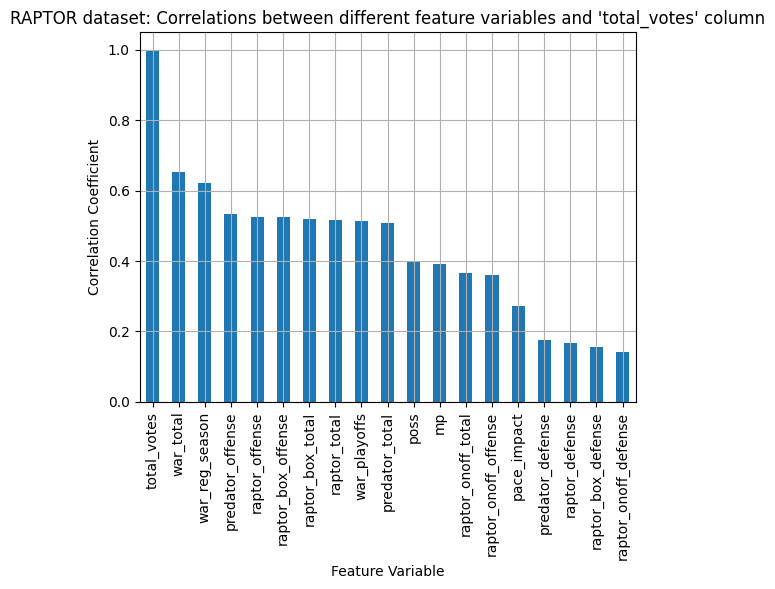

In [ ]:
# Calculating the correlations between all columns/variables in the dataframe
raptor_useful_columns = raptor_2014_2022_final_df.drop(columns=['player_name', 'player_id', 'season'], axis=1)
raptor_var_correlations = round(raptor_useful_columns.corr(), 4)

# Plotting each feature variable and its correlation with 'total_votes' as a bar chart
player_stats_corr = raptor_var_correlations['total_votes'].sort_values(ascending=False)
player_stats_corr.plot(kind='bar')
plt.title("RAPTOR dataset: Correlations between different feature variables and 'total_votes' column")
plt.xlabel('Feature Variable')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

Using this visualization, we can see that pretty much all the features are correlated with the number of total votes. Because of this, we decided to use all features except the features that are a total of other features such as 'raptor_total' and 'predator_total' since they are sum of the '_offense' and '_defence'. Instead of having data that is the total, we decided that would be more useful to use the seperated data values.

## Box Score Data Features

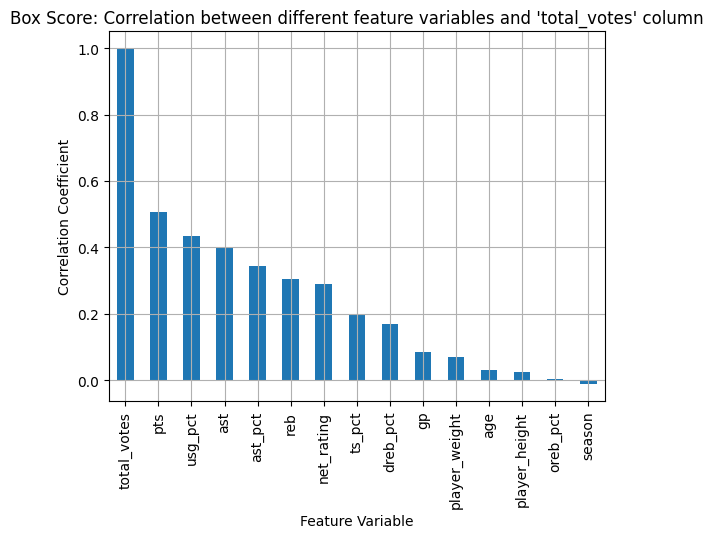

In [ ]:
# Calculating the correlations between all columns/variables in the dataframe
box_score_useful_columns = df_box_final.drop(columns=['player_name', 'team_abbreviation'], axis=1)
box_score_var_correlations = round(box_score_useful_columns.corr(), 4)

# Plotting each feature variable and its correlation with 'total_votes' as a bar chart
player_stats_corr = box_score_var_correlations['total_votes'].sort_values(ascending=False)
player_stats_corr.plot(kind='bar')
plt.title("Box Score: Correlation between different feature variables and 'total_votes' column")
plt.xlabel('Feature Variable')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

Using this data, it is clear that we do not need to use all of the features since only some are significant. We see that the features 'pts', ... 'dreb_pct' have a correlation above 0.15 so we decided to only select those features if our models.

# **Model Development (Training, Tuning and Evaluation)**

In [ ]:
# Importing from the sklearn library to use ML algorithms
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

## Raptor Analysis

### Model Preparation

In [ ]:
# Uses the finalized raptor data we created/exported earlier
# We can also simply use the dataframe (raptor_2014_2022_final_df)
raptor_data = pd.read_csv("raptor_final.csv")

# Select the features we indicated in the feature selection portion. Also
# don't use features that are identifiers like 'player_name'
X = raptor_data[['season',
                 'poss',
                 'mp',
                 'raptor_box_offense',
                 'raptor_box_defense',
                 'raptor_onoff_offense',
                 'raptor_onoff_defense',
                 'raptor_offense',
                 'raptor_defense',
                 'war_total',
                 'war_reg_season',
                 'war_playoffs',
                 'predator_offense',
                 'predator_defense',
                 'pace_impact']]

# set the target variable
y = raptor_data["total_votes"]

# Scaling the data
scaler_raptor = StandardScaler()
X = scaler_raptor.fit_transform(X)

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### Polynomial Linear Regression

In [ ]:
# Params for our grid search. Single hyper-parameter of degree
params = {
    'polynomialfeatures__degree': [1, 2, 3]
}

# Need a custom function to simultaneously create polynomial features and fit
# that into the LinearRegression model. 'make_pipeline' works for this
# Thanks: https://stackoverflow.com/questions/47414819/gridsearchcv-for-polynomial-regression
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


plr = PolynomialRegression()

# Creates and runs the grid search to find the best parameters
plr_grid = GridSearchCV(estimator=plr, param_grid=params, cv=10, return_train_score = True)
plr_grid.fit(X_train, y_train)

print(plr_grid.best_params_)
print(plr_grid.best_score_)

{'polynomialfeatures__degree': 1}
0.533000885074346


In [ ]:
# The Polynomial Regression Model and analysis for the best hyperparameter (1)
poly = PolynomialFeatures(1)
X_poly_train = poly.fit_transform(X_train)

lr_model = LinearRegression()

lr_model.fit(X_poly_train, y_train)

# The predictions for the training data
y_train_pred = lr_model.predict(X_poly_train)


X_poly_test = poly.fit_transform(X_test)
# The predictions for the testing data
y_test_pred = lr_model.predict(X_poly_test)

print('MSE Poly 1 on train data', mean_squared_error(y_train, y_train_pred))
print('R2 Poly 1 on train data', r2_score(y_train, y_train_pred))

print('MSE Poly 1 on test data', mean_squared_error(y_test, y_test_pred))
print('R2 Poly 1 on test data', r2_score(y_test, y_test_pred))


## Force negative predictions to be 0 (since it is impossible to have negative votes)
## Leads to a better MSE

# Create a copy of the trained predictions
y_train_pred_pos = y_train_pred.copy()
# Convert negative predictions to 0
y_train_pred_pos[y_train_pred_pos < 0] = 0


print('MSE Poly 1 on train data forced positive', mean_squared_error(y_train, y_train_pred_pos))
print('R2 Poly 1 on train data forced positive', r2_score(y_train, y_train_pred_pos))

# Create a copy of the test predictions
y_test_pred_pos = y_test_pred.copy()
# Convert negative predictions to 0
y_test_pred_pos[y_test_pred_pos < 0] = 0

print('MSE Poly 1 on test data forced positive', mean_squared_error(y_test, y_test_pred_pos))
print('R2 Poly 1 on test data forced positive', r2_score(y_test, y_test_pred_pos))

MSE Poly 1 on train data 2802.4306063957506
R2 Poly 1 on train data 0.583468796738327
MSE Poly 1 on test data 3483.5042605537383
R2 Poly 1 on test data 0.5767439228784499
MSE Poly 1 on train data forced positive 2570.956485176277
R2 Poly 1 on train data forced positive 0.6178732861895353
MSE Poly 1 on test data forced positive 3207.710310050958
R2 Poly 1 on test data forced positive 0.6102537040793794


### Random Forest Regression

In [ ]:
# Params for our grid search for random forest
params = {
  'n_estimators': [50, 100, 150, 200, 250],
  'max_depth': [None, 3, 4, 5],
}

# Initialized a Random Forest Regression model with a set state for reproducability
rfr = RandomForestRegressor(random_state=7)

# Creates and runs the grid search to find the best parameters
rfr_grid = GridSearchCV(estimator=rfr, param_grid=params, cv=10, return_train_score = True)
rfr_grid.fit(X_train, y_train)

print(rfr_grid.best_params_)
print(rfr_grid.best_score_)

{'max_depth': 5, 'n_estimators': 200}
0.6364078673279823


In [ ]:
# Based on the grid search, the best parameters were n_estimators of 200 and max_depth of 5
rfr_raptor = RandomForestRegressor(n_estimators=200, max_depth=5 ,random_state=7)
rfr_raptor.fit(X_train, y_train)

# The predictions for the training data
y_train_pred = rfr_raptor.predict(X_train)
# The predictions for the test data
y_test_pred = rfr_raptor.predict(X_test)

# Get model scores on train data
print('MSE for Random Forest on train data', mean_squared_error(y_train, y_train_pred))
print('R2 score for Random Forest on train data', r2_score(y_train, y_train_pred))

# Get model scores on test data
print('MSE for Random Forest on test data', mean_squared_error(y_test, y_test_pred))
print('R2 score for Random Forest on test data', r2_score(y_test, y_test_pred))

# Like Polynomial Regression, we want to convert negative predictions to 0
y_train_pred_pos = y_train_pred.copy()
y_train_pred_pos[y_train_pred_pos < 0] = 0


print('MSE for Random Forest on train data forced positive',
      mean_squared_error(y_train, y_train_pred_pos))
print('R2 score for Random Forest on train data forced positive',
      r2_score(y_train, y_train_pred_pos))

# Convert negative predictions for test data too
y_test_pred_pos = y_test_pred.copy()
y_test_pred_pos[y_test_pred_pos < 0] = 0

print('MSE for Random Forest on test data forced positive', mean_squared_error(y_test, y_test_pred_pos))
print('R2 score for Random Forest on test data forced positive', r2_score(y_test, y_test_pred_pos))

# Interestingly, Random Forest Regression made no predictions with a negative number

MSE for Random Forest on train data 763.0485410813664
R2 score for Random Forest on train data 0.8865864773820551
MSE for Random Forest on test data 2361.825562942766
R2 score for Random Forest on test data 0.7130312042570471
MSE for Random Forest on train data forced positive 763.0485410813664
R2 score for Random Forest on train data forced positive 0.8865864773820551
MSE for Random Forest on test data forced positive 2361.825562942766
R2 score for Random Forest on test data forced positive 0.7130312042570471


### SVM Regressor

In [ ]:
# Params for the grid search for SVR
params = {
  'C': [0.1, 1, 10],
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'degree': [2, 3, 4]
}

# Initialize the SVR model
svr = SVR()

# Create and run the GridSearch for the best parameters
svr_grid = GridSearchCV(estimator = svr, param_grid=params, cv=10, return_train_score=True)
svr_grid.fit(X_train, y_train)

print(svr_grid.best_params_)
print(svr_grid.best_score_)

{'C': 1, 'degree': 3, 'kernel': 'poly'}
0.5049708224830717


In [ ]:
# Based on the grid search, the best hyper-parameters were C of 1, degree of 3
# and kernel of poly
svr = SVR(C=1, degree=3, kernel='poly')
svr.fit(X_train, y_train)

# Predictions for both training and testing data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print('MSE for SVR on train data', mean_squared_error(y_train, y_train_pred))
print('R2 for SVR on train data', r2_score(y_train, y_train_pred))

print('MSE for SVR on test data', mean_squared_error(y_test, y_test_pred))
print('R2 for SVR on test data', r2_score(y_test, y_test_pred))

# Like Polynomial Regression, we want to convert negative predictions to 0
y_train_pred_pos = y_train_pred.copy()
y_train_pred_pos[y_train_pred_pos < 0] = 0

print('MSE for SVR on train data forced positive', mean_squared_error(y_train, y_train_pred_pos))
print('R2 for SVR on train data forced positive', r2_score(y_train, y_train_pred_pos))

# Convert negative predictions for test data too
y_test_pred_pos = y_test_pred.copy()
y_test_pred_pos[y_test_pred_pos < 0] = 0

print('MSE for SVR on test data forced positive', mean_squared_error(y_test, y_test_pred_pos))
print('R2 for SVR on test data forced positive', r2_score(y_test, y_test_pred_pos))

MSE for SVR on train data 3059.482390197728
R2 for SVR on train data 0.5452626450629777
MSE for SVR on test data 4869.793679009453
R2 for SVR on test data 0.40830565579925016
MSE for SVR on train data forced positive 3054.286535828448
R2 for SVR on train data forced positive 0.5460349159150978
MSE for SVR on test data forced positive 4864.57034504693
R2 for SVR on test data forced positive 0.40894030633420364


## Box Score Analysis

Note: The modeling process is essentially the same as RAPTOR. We will run a grid search for each model, use the best hyper-parameters, predict the total_votes, and score the model.

### Model Preparation

In [ ]:
# Uses the finalized box score data we created/exported earlier
# We can also simply use the dataframe (df_box_final)
boxscore_data = pd.read_csv("boxScore_final.csv")

# Select the features indicated from the feature selection portion
X = boxscore_data[['pts',
                   'usg_pct',
                   'ast',
                   'ast_pct',
                   'reb',
                   'dreb_pct',
                   'net_rating',
                   'ts_pct']]

# Set the target variable
y = boxscore_data["total_votes"]

# Scale the data
scaler_box = StandardScaler()
X = scaler_box.fit_transform(X)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### Polynomial Linear Regression

In [ ]:
# Params for our grid search. Single hyper-parameter of degree
params = {
    'polynomialfeatures__degree': [1, 2, 3]
}

# Need a custom function to simultaneously create polynomial features and fit
# that into the LinearRegression model. 'make_pipeline' works for this
# Thanks: https://stackoverflow.com/questions/47414819/gridsearchcv-for-polynomial-regression
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


plr = PolynomialRegression()

# Creates and runs the grid search to find the best parameters
plr_grid = GridSearchCV(estimator=plr, param_grid=params, cv=10, return_train_score = True)
plr_grid.fit(X_train, y_train)

print(plr_grid.best_params_)
print(plr_grid.best_score_)

{'polynomialfeatures__degree': 3}
0.6046926963392593


In [ ]:
# The Polynomial Regression Model and analysis for the best hyperparameter (3)
poly = PolynomialFeatures(3)
X_poly_train = poly.fit_transform(X_train)

lr_model = LinearRegression()

lr_model.fit(X_poly_train, y_train)

# The predictions for the training data
y_train_pred = lr_model.predict(X_poly_train)


X_poly_test = poly.fit_transform(X_test)
# The predictions for the testing data
y_test_pred = lr_model.predict(X_poly_test)

print('MSE Poly on train data', mean_squared_error(y_train, y_train_pred))
print('R2 Poly on train data', r2_score(y_train, y_train_pred))

print('MSE Poly on test data', mean_squared_error(y_test, y_test_pred))
print('R2 Poly on test data', r2_score(y_test, y_test_pred))


## Force negative predictions to be 0 (since it is impossible to have negative votes)
## Leads to a better MSE

# Create a copy of the trained predictions
y_train_pred_pos = y_train_pred.copy()
# Convert negative predictions to 0
y_train_pred_pos[y_train_pred_pos < 0] = 0


print('MSE Poly on train data forced positive', mean_squared_error(y_train, y_train_pred_pos))
print('R2 Poly on train data forced positive', r2_score(y_train, y_train_pred_pos))

# Create a copy of the test predictions
y_test_pred_pos = y_test_pred.copy()
# Convert negative predictions to 0
y_test_pred_pos[y_test_pred_pos < 0] = 0

print('MSE Poly on test data forced positive', mean_squared_error(y_test, y_test_pred_pos))
print('R2 Poly on test data forced positive', r2_score(y_test, y_test_pred_pos))

MSE Poly on train data 965.2362717438477
R2 Poly on train data 0.8152623998304553
MSE Poly on test data 3067.8962520677105
R2 Poly on test data 0.6396368524515357
MSE Poly on train data forced positive 894.3985274971413
R2 Poly on train data forced positive 0.8288201113013659
MSE Poly on test data forced positive 2973.7138717944595
R2 Poly on test data forced positive 0.6506997620841546


### Random Forest Regression

In [ ]:
# Params for our grid search for random forest
params = {
  'n_estimators': [50, 100, 150, 200, 250],
  'max_depth': [None, 3, 4, 5],
}

# Initialized a Random Forest Regression model with a set state for reproducability
rfr = RandomForestRegressor(random_state=7)

# Creates and runs the grid search to find the best parameters
rfr_grid = GridSearchCV(estimator=rfr, param_grid=params, cv=10, return_train_score = True)
rfr_grid.fit(X_train, y_train)

print(rfr_grid.best_params_)
print(rfr_grid.best_score_)

{'max_depth': 5, 'n_estimators': 50}
0.7037497572449694


In [ ]:
# Based on the grid search, the best parameters were n_estimators of 150 and max_depth of None
rfr_box = RandomForestRegressor(n_estimators=50, max_depth=5 ,random_state=7)
rfr_box.fit(X_train, y_train)

# The predictions for the training data
y_train_pred = rfr_box.predict(X_train)
# The predictions for the test data
y_test_pred = rfr_box.predict(X_test)

# Get model scores on train data
print('MSE for Random Forest on train data', mean_squared_error(y_train, y_train_pred))
print('R2 score for Random Forest on train data', r2_score(y_train, y_train_pred))

# Get model scores on test data
print('MSE for Random Forest on test data', mean_squared_error(y_test, y_test_pred))
print('R2 score for Random Forest on test data', r2_score(y_test, y_test_pred))

# Like Polynomial Regression, we want to convert negative predictions to 0
y_train_pred_pos = y_train_pred.copy()
y_train_pred_pos[y_train_pred_pos < 0] = 0


print('MSE for Random Forest on train data forced positive',
      mean_squared_error(y_train, y_train_pred_pos))
print('R2 score for Random Forest on train data forced positive',
      r2_score(y_train, y_train_pred_pos))

# Convert negative predictions for test data too
y_test_pred_pos = y_test_pred.copy()
y_test_pred_pos[y_test_pred_pos < 0] = 0

print('MSE for Random Forest on test data forced positive', mean_squared_error(y_test, y_test_pred_pos))
print('R2 score for Random Forest on test data forced positive', r2_score(y_test, y_test_pred_pos))

# Interestingly, Random Forest Regression made no predictions with a negative number

MSE for Random Forest on train data 554.8419910961387
R2 score for Random Forest on train data 0.893808199185045
MSE for Random Forest on test data 2999.1015636345655
R2 score for Random Forest on test data 0.647717657153349
MSE for Random Forest on train data forced positive 554.8419910961387
R2 score for Random Forest on train data forced positive 0.893808199185045
MSE for Random Forest on test data forced positive 2999.1015636345655
R2 score for Random Forest on test data forced positive 0.647717657153349


### SVM Regressor

In [ ]:
# Params for the grid search for SVR
params = {
  'C': [0.1, 1, 10],
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'degree': [2, 3, 4]
}

# Initialize the SVR model
svr = SVR()

# Create and run the GridSearch for the best parameters
svr_grid = GridSearchCV(estimator = svr, param_grid=params, cv=10, return_train_score=True)
svr_grid.fit(X_train, y_train)

print(svr_grid.best_params_)
print(svr_grid.best_score_)

{'C': 1, 'degree': 4, 'kernel': 'poly'}
0.6027365134723002


In [ ]:
# Based on the grid search, the best hyper-parameters were C of 10, degree of 4
# and kernel of poly
svr = SVR(C=1, degree=4, kernel='poly')
svr.fit(X_train, y_train)

# Predictions for both training and testing data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print('MSE for SVR on train data', mean_squared_error(y_train, y_train_pred))
print('R2 for SVR on train data', r2_score(y_train, y_train_pred))

print('MSE for SVR on test data', mean_squared_error(y_test, y_test_pred))
print('R2 for SVR on test data', r2_score(y_test, y_test_pred))

# Like Polynomial Regression, we want to convert negative predictions to 0
y_train_pred_pos = y_train_pred.copy()
y_train_pred_pos[y_train_pred_pos < 0] = 0

print('MSE for SVR on train data forced positive', mean_squared_error(y_train, y_train_pred_pos))
print('R2 for SVR on train data forced positive', r2_score(y_train, y_train_pred_pos))

# Convert negative predictions for test data too
y_test_pred_pos = y_test_pred.copy()
y_test_pred_pos[y_test_pred_pos < 0] = 0

print('MSE for SVR on test data forced positive', mean_squared_error(y_test, y_test_pred_pos))
print('R2 for SVR on test data forced positive', r2_score(y_test, y_test_pred_pos))

MSE for SVR on train data 1755.0183818318949
R2 for SVR on train data 0.6641051589085931
MSE for SVR on test data 4100.948588899786
R2 for SVR on test data 0.518291813018668
MSE for SVR on train data forced positive 1754.5355742072763
R2 for SVR on train data forced positive 0.6641975639751312
MSE for SVR on test data forced positive 4100.385725562375
R2 for SVR on test data forced positive 0.5183579284238982


# **Results**

After running the 6 models (Polynomial Regression, Random Forest Regression, and SVR Models) for both datasets (RAPTOR and Box Score), we can see that the box score data outperformed the RAPTOR data for the polynomial and support vector regression models (the Box Score models scoring an MSE of 2973.7 and 4100.4 compared to RAPTOR’s MSE of 3207.7 and 4864.6 respectively), while RAPTOR outperformed in the random forest regression models (RAPTOR had a lower MSE of 2361.8 compared to Box Score’s 2999.1).

 This indicates that both datasets are insightful in evaluating player impact, despite the difference in what their numbers indicate. Ultimately, the best model for predicting All-NBA votes was the Random Forest Regression using RAPTOR data, as it had the lowest MSE of

it is clear that the best model and data source to use is Random Forest Regression with RAPTOR data since it gave the best R2 score of 0.713.

Additionally, since all the models using the RAPTOR were better models than the Box Score models, we can confidently say that using the RAPTOR metric is the better metric to use to determine who are the best NBA players.

After running the 6 models,



# **Expanding on the Model (Predicting 2023 All-NBA Team)**

To expand on our project and model, we have decided to predict the 2023 All-NBA team using RAPTOR data of the 2023 season and our best model, Random Forest Regression.

Since our model will predict the number of votes, and the players with the top 15 votes make the All-NBA team, we can predict who will make the All-NBA team and who will not. This is ultimately the end goal for our project and why we needed to predict votes.

In [ ]:
# Uses the finalized RAPTOR 2023 data we created/exported earlier
# We can also simply use the dataframe (raptor_2023_final_df)
raptor_2023_data = pd.read_csv("raptor_2023_final.csv")

# Select the same features we did for the 2014-2022 RAPTOR data
X_2023 = raptor_2023_data[['season',
                 'poss',
                 'mp',
                 'raptor_box_offense',
                 'raptor_box_defense',
                 'raptor_onoff_offense',
                 'raptor_onoff_defense',
                 'raptor_offense',
                 'raptor_defense',
                 'war_total',
                 'war_reg_season',
                 'war_playoffs',
                 'predator_offense',
                 'predator_defense',
                 'pace_impact']]

# Set the target variable
y_2023 = raptor_2023_data["total_votes"]

# Scale the data using the same scaler as the 2014-2022 scaler
X_2023_scaled = scaler_raptor.transform(X_2023)

# Note: we will not split this data set to train and test since this
# whole data set is essentially the test dataset. We want to use the
# already fitted model on this new dataset

In [ ]:
# Use the same best random forest regression model as 2014-2022
y_2023_pred= rfr_raptor.predict(X_2023_scaled)

# Convert any negative predictions to 0
y_2023_pred[y_2023_pred < 0] = 0

print('MSE for RAPTOR 2023 Predicted', mean_squared_error(y_2023, y_2023_pred))
print('R2 for RAPTOR 2023 Predicted', r2_score(y_2023, y_2023_pred))

MSE for RAPTOR 2023 Predicted 2876.9544611925594
R2 for RAPTOR 2023 Predicted 0.497179789587047


Converting predicted votes to 1 if the player is in the top 15 votes, and 0 if not

In [ ]:
# Converting a Series to np array
y_2023_nparray = y_2023.values

# Creating a copy of the Raptor 2023 DataFrame to add more columns
raptor_2023_data_with_predicted = pd.DataFrame(raptor_2023_data.copy())

# Create a column called 'predicted_votes' to store our predicted votes
# within our copied dataframe
raptor_2023_data_with_predicted['predicted_votes'] = y_2023_pred

In [ ]:
# Create a DataFrame with just the top 15 predicted votes
# This will be used for the binary classification
raptor_2023_data_with_predicted_top_15_predicted = raptor_2023_data_with_predicted.sort_values(by='predicted_votes', ascending=False).head(15)

In [ ]:
# Create a new column for the prediction of whether or not they are on the allNBA team
# This is done by setting 1 if the name in the whole dataset is also present in the top 15
# dataset previously created
raptor_2023_data_with_predicted['predicted_is_allNBA'] = raptor_2023_data_with_predicted['player_name'].isin(
    raptor_2023_data_with_predicted_top_15_predicted['player_name']).astype(int)

In [ ]:
# Show the top 15 actual players that made the All-NBA teams
raptor_2023_data_with_predicted.sort_values(by='is_allNBA', ascending=False).head(15)

,Unnamed: 0,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,...,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,total_votes,is_allNBA,predicted_votes,predicted_is_allNBA
53,53,Stephen Curry,curryst01,2023,5300,2434,7.344270,-1.371424,5.972846,5.967627,...,9.290962,2.241821,7.542091,-0.832530,6.709561,1.821577,188.0,1,233.793006,1
74,74,Shai Gilgeous-Alexander,gilgesh01,2023,5208,2416,5.376664,-0.016099,5.360565,1.969240,...,9.862723,0.000000,4.426449,0.890325,5.316774,0.984719,407.0,1,59.874306,0
35,35,Jaylen Brown,brownja02,2023,6542,3156,0.565103,0.196731,0.761834,-2.277576,...,4.118037,0.645863,0.928748,0.508587,1.437335,1.136042,169.0,1,6.891170,0
68,68,De'Aaron Fox,foxde01,2023,5829,2705,4.454935,-1.326320,3.128615,3.359170,...,7.188755,0.158138,4.172847,-1.187411,2.985436,1.014856,144.0,1,50.705111,0
213,213,Jayson Tatum,tatumja01,2023,7273,3531,4.251844,-0.303487,3.948357,4.633275,...,8.987496,3.601728,5.479057,-0.102690,5.376367,-0.154473,484.0,1,202.100589,1
153,153,Donovan Mitchell,mitchdo01,2023,5302,2639,6.175218,-1.055668,5.119550,2.910158,...,9.445017,0.620150,6.103537,-0.089047,6.014490,0.104877,349.0,1,79.805470,0
199,199,Domantas Sabonis,sabondo01,2023,6254,2979,2.161884,1.114524,3.276408,3.239370,...,8.658055,-0.247607,2.232018,0.815072,3.047090,-0.329302,147.0,1,92.655078,1
110,110,LeBron James,jamesle01,2023,5487,2573,4.083170,-0.237473,3.845697,3.701910,...,7.212253,2.163128,4.115700,-0.437134,3.678566,0.580552,81.0,1,45.436435,0
114,114,Nikola Jokic,jokicni01,2023,6435,3112,8.961393,4.308386,13.269780,9.417504,...,20.310952,5.556234,9.328426,3.641945,12.970371,1.533881,364.0,1,461.937440,1
58,58,Luka Doncic,doncilu01,2023,4863,2391,8.850354,-0.325424,8.524930,3.659540,...,12.984393,0.000000,7.922574,-0.179550,7.743024,0.671191,403.0,1,315.131746,1


In [ ]:
# Show the top 15 predicted players that made the All-NBA teams
raptor_2023_data_with_predicted.sort_values(by='predicted_is_allNBA', ascending=False).head(15)

,Unnamed: 0,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,...,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,total_votes,is_allNBA,predicted_votes,predicted_is_allNBA
213,213,Jayson Tatum,tatumja01,2023,7273,3531,4.251844,-0.303487,3.948357,4.633275,...,8.987496,3.601728,5.479057,-0.102690,5.376367,-0.154473,484.0,1,202.100589,1
188,188,Immanuel Quickley,quickim01,2023,5134,2519,1.917331,0.729531,2.646862,-2.962001,...,7.286247,0.488658,1.143342,2.658059,3.801401,-1.001869,0.0,0,93.915334,1
53,53,Stephen Curry,curryst01,2023,5300,2434,7.344270,-1.371424,5.972846,5.967627,...,9.290962,2.241821,7.542091,-0.832530,6.709561,1.821577,188.0,1,233.793006,1
54,54,Anthony Davis,davisan02,2023,5327,2512,2.385891,4.700177,7.086068,2.222876,...,9.767810,3.180883,2.939710,4.570632,7.510342,0.296532,65.0,0,184.711367,1
37,37,Jalen Brunson,brunsja01,2023,5693,2822,5.115748,0.185945,5.301693,6.734033,...,8.137781,2.717293,6.254473,-0.195013,6.059459,-0.951976,23.0,0,160.321622,1
27,27,Devin Booker,bookede01,2023,4744,2294,5.616372,0.002213,5.618585,6.085778,...,6.777623,3.204421,5.632922,0.377525,6.010447,0.650832,10.0,0,84.681352,1
114,114,Nikola Jokic,jokicni01,2023,6435,3112,8.961393,4.308386,13.269780,9.417504,...,20.310952,5.556234,9.328426,3.641945,12.970371,1.533881,364.0,1,461.937440,1
58,58,Luka Doncic,doncilu01,2023,4863,2391,8.850354,-0.325424,8.524930,3.659540,...,12.984393,0.000000,7.922574,-0.179550,7.743024,0.671191,403.0,1,315.131746,1
89,89,James Harden,hardeja01,2023,5091,2562,5.409390,0.509514,5.918904,1.302011,...,9.219172,0.576484,4.964376,0.076044,5.040420,-0.972478,6.0,0,107.151616,1
7,7,Giannis Antetokounmpo,antetgi01,2023,4574,2115,3.378603,1.927022,5.305625,2.646947,...,9.313686,-0.390002,3.450267,1.223377,4.673643,1.632326,500.0,1,117.531825,1


In [ ]:
# Calculate the accuracy of our model when predicting if the player made the
# All-NBA team
accuracy = accuracy_score(raptor_2023_data_with_predicted['is_allNBA'], raptor_2023_data_with_predicted['predicted_is_allNBA'])
print('Accuracy of model to determine who makes the All-NBA team', accuracy)

Accuracy of model to determine who makes the All-NBA team 0.9510204081632653


After analysis, our model was 95.1% accurate in determining whether a player made the All-NBA team.

It is important to note that examination, our model dot not account for positional limits that are present in the actual NBA All-NBA team selections. In the actual selection, there has to be 3 players for each position (5 position), hence 15 players. However, our model does not take this rule into account which is an area we can expand in the future.